In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
features = pd.read_csv("../features/features_all.csv")

In [25]:
cols = features.columns
features = features[cols[3:-1]]

In [26]:
features.describe()

,2,3,4,5,6,7,8,9,10,11,...,42,43,44,45,46,47,48,49,50,51
count,69211.000000,69211.000000,69211.000000,69211.000000,69211.000000,69211.000000,69211.000000,69211.000000,69211.000000,69211.000000,...,69211.000000,69211.000000,69211.000000,69211.000000,69211.000000,69211.000000,69211.000000,69211.000000,69211.000000,69211.000000
mean,20382.085032,1538.416939,2149.545279,2288.642601,2488.672156,2979.230919,3707.544789,4781.430582,5105.266605,5378.896914,...,5334.144067,6972.647657,7595.947277,7941.842973,7570.346332,6923.324558,6717.557440,6180.055266,6453.175478,5927.303651
std,5188.060830,4947.776145,4911.626137,4904.180568,4893.369527,4867.506315,4835.662615,4808.263679,4808.682455,4809.003921,...,5092.697548,5143.115274,5200.259194,5222.354007,5220.413679,5187.553934,5207.223368,5185.069095,5247.016385,5208.690989
min,7149.000000,0.000000,669.333333,586.000000,873.000000,1116.250000,1495.363636,1986.750000,2068.000000,2145.363636,...,1550.000000,2019.000000,2068.000000,2209.000000,2135.000000,1853.000000,1747.000000,1457.000000,1420.000000,1250.000000
25%,17486.860063,931.154656,1440.238286,1554.063003,1719.539976,2127.478068,2721.676115,3589.814354,3840.300000,4056.666822,...,3708.000000,4914.000000,5327.000000,5593.000000,5267.000000,4816.000000,4628.000000,4215.000000,4347.000000,3956.000000
50%,19794.666667,1107.945946,1718.138889,1857.962963,2059.110294,2551.655172,3278.089744,4340.800000,4650.178571,4915.877358,...,4983.000000,6641.000000,7244.000000,7591.000000,7215.000000,6538.000000,6297.000000,5746.000000,5972.000000,5459.000000
75%,22430.821056,1310.394053,2022.941676,2189.252500,2429.329060,3023.191323,3900.634097,5175.566667,5553.674242,5884.034077,...,6043.000000,8074.000000,8872.000000,9280.000000,8866.000000,8047.000000,7813.000000,7159.000000,7533.000000,6899.000000
max,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,...,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000


In [50]:
from sklearn.preprocessing import StandardScaler

features_n = StandardScaler().fit_transform(features[outliers==0])

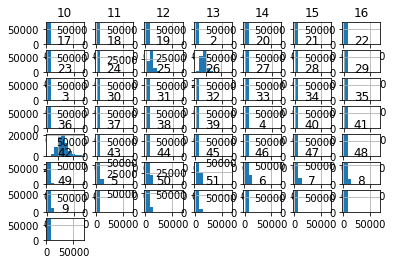

In [51]:
features.hist()
plt.show()

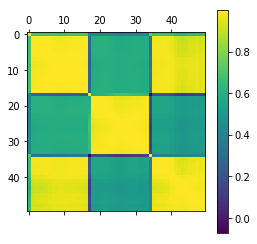

In [52]:
plt.matshow(features.corr())
plt.colorbar()

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(features_n)

In [54]:
features_pca = pca.transform(features_n)

In [55]:
features_pca.shape

(68760, 2)

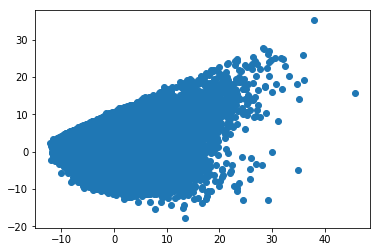

In [56]:
plt.figure()
plt.scatter(features_pca[:,0],features_pca[:,1])

In [60]:
from sklearn.cluster import KMeans, SpectralClustering

kmeans = KMeans(n_clusters=2, random_state=0, init = 'random').fit(features_n)

labels = kmeans.predict(features_n)

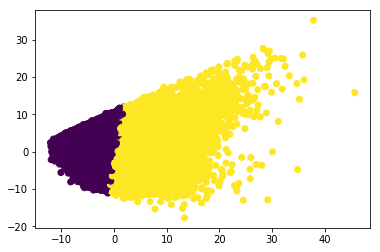

In [58]:
plt.figure()
plt.scatter(features_pca[:,0],features_pca[:,1],c=labels)

In [62]:
spectral = SpectralClustering(n_clusters=2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit(features_n)

labels = spectral.predict(features_n)

MemoryError: 

In [ ]:
plt.figure()
plt.scatter(features_pca[:,0],features_pca[:,1],c=labels)

In [ ]:
unique, counts = np.unique(labels, return_counts=True)

In [ ]:
dict(zip(unique, counts))

In [38]:
outliers = labels 

In [40]:
labels[labels==0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)